In [ ]:

from google.colab import drive


drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Set up data folder
from pathlib import Path

DATA = Path("/content/drive/My Drive/2019 ECBM E4060/data/hw2")

Mutation load

MAF files of the TCGA breast cancer data set

[TCGA.BRCA.mutect.995c0111-d90b-4140-bee7-3845436c3b42.DR-10.0.somatic.maf.gz](https://drive.google.com/open?id=1uHbd54NBXBt901BkDr-W6lnTP0xuUomE)

In [ ]:
maf_file = "TCGA.BRCA.mutect.995c0111-d90b-4140-bee7-3845436c3b42.DR-10.0.somatic.maf.gz"

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [ ]:
maf = pd.read_csv(DATA / maf_file, sep="\t", comment='#')

maf.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (87,88,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count,all_effects,Allele,Gene,Feature,Feature_type,One_Consequence,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,ALLELE_NUM,DISTANCE,TRANSCRIPT_STRAND,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,RefSeq,SIFT,PolyPhen,EXON,INTRON,DOMAINS,GMAF,AFR_MAF,AMR_MAF,ASN_MAF,EAS_MAF,EUR_MAF,SAS_MAF,AA_MAF,EA_MAF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED,ExAC_AF,ExAC_AF_Adj,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,USP24,23358,WUGSC,GRCh38,chr1,55159655,55159655,+,Missense_Mutation,SNP,T,T,C,rs150880897,by1000G;byCluster;byFrequency,TCGA-D8-A1XY-01A-11D-A14K-09,TCGA-D8-A1XY-10A-01D-A14K-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,edb6d161-8f50-4c11-8246-487c4ea9a55d,8dea96d9-5017-4872-a84e-33bfd2f37b7a,c.1024A>G,p.Ile342Val,p.I342V,ENST00000294383,9/68,82,49,33,126,NaN,NaN,"USP24,missense_variant,p.I342V,ENST00000294383...",C,ENSG00000162402,ENST00000294383,Transcript,missense_variant,missense_variant,1024/10549,1024/7863,342/2620,I/V,Atc/Gtc,rs150880897,1,NaN,-1.0,USP24,HGNC,HGNC:12623,protein_coding,YES,CCDS44154.2,ENSP00000294383,Q9UPU5,NaN,UPI000059CFDE,NM_015306.2,tolerated(0.37),benign(0.003),9/68,NaN,NaN,0.0020,0.0076,0.0,NaN,0.0,0.0,0.0,0.0059,0.0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,1.0,SNV,5.0,NaN,NaN,1,0.000715,0.002251,0.009470,0.0,0.0,0.0,0.002752,0.003676,0.0,NaN,panel_of_normals,CTGGATTGTAG,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,common_in_exac;gdc_pon,NaN,True,Unknown
1,ERICH3,127254,WUGSC,GRCh38,chr1,74571494,74571494,+,Missense_Mutation,SNP,C,C,T,NaN,NaN,TCGA-D8-A1XY-01A-11D-A14K-09,TCGA-D8-A1XY-10A-01D-A14K-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,edb6d161-8f50-4c11-8246-487c4ea9a55d,8dea96d9-5017-4872-a84e-33bfd2f37b7a,c.4216G>A,p.Glu1406Lys,p.E1406K,ENST00000326665,14/15,86,42,44,64,NaN,NaN,"ERICH3,missense_variant,p.E1406K,ENST000003266...",T,ENSG00000178965,ENST00000326665,Transcript,missense_variant,missense_variant,4435/7159,4216/4593,1406/1530,E/K,Gag/Aag,NaN,1,NaN,-1.0,ERICH3,HGNC,HGNC:25346,protein_coding,YES,CCDS30755.1,ENSP00000322609,Q5RHP9,NaN,UPI0000237200,NM_001002912.4,deleterious(0.01),possibly_damaging(0.833),14/15,NaN,PROSITE_profiles:PS50313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,1.0,SNV,5.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS,TTCCTCTACCA,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1474194,True,Unknown
2,KIF26B,55083,WUGSC,GRCh38,chr1,245419680,245419680,+,Silent,SNP,G,G,T,NaN,NaN,TCGA-D8-A1XY-01A-11D-A14K-09,TCGA-D8-A1XY-10A-01D-A14K-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,edb6d161-8f50-4c11-8246-487c4ea9a55d,8dea96d9-5017-4872-a84e-33bfd2f37b7a,c.1101G>T,p.=,p.S367S,ENST00000407071,

In [ ]:
mut = maf[(maf.FILTER == "PASS")]
print("{} out of {} mutations passed the filtering criteria, {:.2f}%".format(
    len(mut), len(maf), 100 * len(mut) / len(maf)))


116693 out of 120988 mutations passed the filtering criteria, 96.45%


In [ ]:
mmr = ['PMS2','MSH6','RFC','PCNA','MLH1','MSH2','MSH3','MLH3']


In [ ]:
# mt = mut.groupby("Tumor_Sample_Barcode")

mt = mut.groupby("Tumor_Sample_Barcode")["Hugo_Symbol"].count().reset_index()
mt.sort_values('Hugo_Symbol', ascending = False, inplace = True)
mt.head()

,Tumor_Sample_Barcode,Hugo_Symbol
257,TCGA-AN-A046-01A-21W-A050-09,6890
219,TCGA-AC-A23H-01A-11D-A159-09,6008
6,TCGA-5L-AAT1-01A-12D-A41F-09,1916
538,TCGA-BH-A18G-01A-11D-A12B-09,1752
263,TCGA-AN-A0AK-01A-21W-A019-09,1733


Identify the samples who have mutations in their MMR genes.

In [ ]:
 
# mat = mut.groupby("Tumor_Sample_Barcode")
# Sample_list = mut.Tumor_Sample_Barcode.unique()

l = mut.loc[mut['Hugo_Symbol'].isin(mmr)]
Sample_list = l.groupby("Tumor_Sample_Barcode")
tumor_list = l.Tumor_Sample_Barcode.unique()
group_info = l.groupby("Tumor_Sample_Barcode")['Hugo_Symbol'].nunique().reset_index()
Sample_list.head()


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count,all_effects,Allele,Gene,Feature,Feature_type,One_Consequence,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,ALLELE_NUM,DISTANCE,TRANSCRIPT_STRAND,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,RefSeq,SIFT,PolyPhen,EXON,INTRON,DOMAINS,GMAF,AFR_MAF,AMR_MAF,ASN_MAF,EAS_MAF,EUR_MAF,SAS_MAF,AA_MAF,EA_MAF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED,ExAC_AF,ExAC_AF_Adj,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
1483,MLH3,27030,WUGSC,GRCh38,chr14,75049506,75049506,+,Missense_Mutation,SNP,G,G,T,novel,NaN,TCGA-BH-A2L8-01A-11D-A18P-09,TCGA-BH-A2L8-10A-01D-A18P-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,ce4179d3-b31d-4242-8ec1-f6785f9af2e1,b0e8676c-6f2d-4691-96c5-b323dded9687,c.150C>A,p.Phe50Leu,p.F50L,ENST00000355774,2/13,27,24,3,35,NaN,NaN,"MLH3,missense_variant,p.F50L,ENST00000355774,N...",T,ENSG00000119684,ENST00000355774,Transcript,missense_variant,missense_variant,366/7896,150/4362,50/1453,F/L,ttC/ttA,NaN,1,NaN,-1.0,MLH3,HGNC,HGNC:7128,protein_coding,YES,CCDS32123.1,ENSP00000348020,Q9UHC1,NaN,NaN,NM_001040108.1,deleterious(0.03),benign(0.049),2/13,NaN,Pfam_domain:PF02518;Superfamily_domains:SSF55874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,NaN,SNV,5.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS,ACTTGGAAGGT,11ec0db5-b9df-4819-b610-2e2b788722a5,85a8276c-d322-4888-b649-e375aaf1398c,1fc01ace-df30-48b0-bb77-dc862ae9d52b,bac4b268-c781-4408-96d8-43a48fec7418,NaN,NaN,True,Unknown
2251,MLH1,4292,WUGSC,GRCh38,chr3,37004425,37004425,+,Missense_Mutation,SNP,G,G,C,rs587779005,NaN,TCGA-D8-A1XK-01A-21D-A14K-09,TCGA-D8-A1XK-10A-01D-A14K-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,8b704b7c-56d2-4816-8c47-055a794afb69,9f5b3aca-b473-43e0-9dc5-6339152822a5,c.331G>C,p.Ala111Pro,p.A111P,ENST00000231790,4/19,158,90,68,126,NaN,NaN,"MLH1,missense_variant,p.A111P,ENST00000231790,...",C,ENSG00000076242,ENST00000231790,Transcript,missense_variant,missense_variant,547/2752,331/2271,111/756,A/P,Gct/Cct,rs587779005,1,NaN,1.0,MLH1,HGNC,HGNC:7127,protein_coding,YES,CCDS2663.1,ENSP00000231790,P40692,NaN,UPI0000000C7E,NM_000249.3,deleterious(0),probably_damaging(1),4/19,NaN,Pfam_domain:PF02518;TIGRFAM_domain:TIGR00585;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uncertain_significance,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,1.0,SNV,1.0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS,ATGTGGCTCAT,6a1efd07-5111-4ae2-b733-0c2eca3517b6,70c1e811-e680-4389-86f6-6950ab1b0eb4,c289b430-5516-46f0-8910-55ac1cd62f2f,97943d87-fed7-4f14-a0a7-c5bfee64c392,NaN,COSM3823738,True,Unknown
2928,MLH3,27030,WUGSC,GRCh38,chr14,75049526,75049526,+,Missense_Mutation,SNP,T,T,C,NaN,NaN,TCGA-D8-A1XK-01A-21D-A14K-09,TCGA-D8-A1XK-10A-01D-A14K-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,8b704b7c-56d2-4816-8c47-055a794afb69,9f5b3aca-b473-43e0-9dc5-6339152822a5,c.130A>G,p.Arg44Gly,p.R44G,ENST00000355774,2/13,73,50,23,43,NaN,NaN,

Text(0, 0.5, 'Mutation Load(log)')

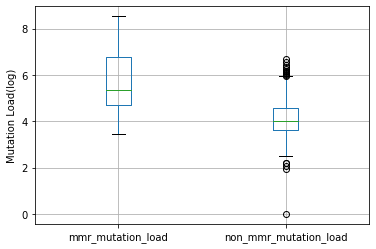

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

MMR_samples = mut[mut.Tumor_Sample_Barcode.isin(tumor_list)]
MMR_samples_info = MMR_samples.groupby("Tumor_Sample_Barcode")['Hugo_Symbol'].nunique().reset_index()
non_MMR_samples = mut[~mut.Tumor_Sample_Barcode.isin(tumor_list)]
non_MMR_samples_info = non_MMR_samples.groupby("Tumor_Sample_Barcode")['Hugo_Symbol'].nunique().reset_index()

box = pd.concat([MMR_samples_info,non_MMR_samples_info], ignore_index = True, axis = 1)
box.columns = ['mmr_patients_ID','mmr_mutation_load', 'non_mmr_patients_ID', 'non_mmr_mutation_load']
box.mmr_mutation_load = np.log(box.mmr_mutation_load) 
box.non_mmr_mutation_load = np.log(box.non_mmr_mutation_load) 
boxplot = box.boxplot(column=['mmr_mutation_load','non_mmr_mutation_load'])
boxplot.set_ylabel("Mutation Load(log)")


In [ ]:
from scipy import stats
mmr_mut_load = np.log(MMR_samples_info['Hugo_Symbol'])
non_mmr_mut_load = np.log(non_MMR_samples_info['Hugo_Symbol'])

stats.ttest_ind(mmr_mut_load, non_mmr_mut_load)


Ttest_indResult(statistic=13.661339796902546, pvalue=4.925783425512052e-39)

When there is a mutation in the MMR gene, the repair mechanism fails and it becomes more likely yo have mutations in other genes. 


Systematic pathway mutation analysis



In [ ]:
import requests
from io import StringIO
import numpy as np
import pandas as pd

# Get pathway_id, gene_id table
KEGG_PATHWAY_LINK_BASE = "http://rest.kegg.jp/link/pathway/hsa"
pathway_link = requests.get(KEGG_PATHWAY_LINK_BASE)
kegg = pd.read_csv(StringIO(pathway_link.text), header=None, sep="\t")
kegg.columns = ["gene_id","pathway_id"]

# Get name of each pathway
KEGG_PATHWAY_LIST_BASE = "http://rest.kegg.jp/list/pathway/hsa"
pathway_list = requests.get(KEGG_PATHWAY_LIST_BASE)
kegg_name = pd.read_csv(StringIO(pathway_list.text), header=None,
                                    sep="\t")
kegg_name.columns = ["pathway_id","pathway_name"]

kegg = kegg.merge(kegg_name)
kegg.head()


,gene_id,pathway_id,pathway_name
0,hsa:10327,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...
1,hsa:124,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...
2,hsa:125,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...
3,hsa:126,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...
4,hsa:127,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...


In [ ]:
maf_file = "TCGA.BRCA.mutect.995c0111-d90b-4140-bee7-3845436c3b42.DR-10.0.somatic.maf.gz"
mut1 = maf[(maf.FILTER == "PASS") & (maf.IMPACT != "MODIFIER")]

print("{} out of {} mutations passed the filtering criteria, {:.2f}%".format(
    len(mut1), len(maf), 100 * len(mut1) / len(maf)))

95711 out of 120988 mutations passed the filtering criteria, 79.11%


In [ ]:
pathway = kegg.groupby('pathway_name')['gene_id'].nunique().reset_index()
pathway["Number_of_Samples"] = ""
pathway_list = pathway['pathway_name']
pathway.head()

,pathway_name,gene_id,Number_of_Samples
0,2-Oxocarboxylic acid metabolism - Homo sapiens...,18,
1,ABC transporters - Homo sapiens (human),45,
2,AGE-RAGE signaling pathway in diabetic complic...,100,
3,AMPK signaling pathway - Homo sapiens (human),120,
4,Acute myeloid leukemia - Homo sapiens (human),67,


In [ ]:

pathways = kegg.groupby('pathway_name')


for x in range(0,len(pathway)):
  path = pathways.get_group(pathway_list[x])
  gene= pd.DataFrame(path['gene_id'])
  gene_list= gene.gene_id.apply(lambda x: x.strip('hsa:'))
  n = mut1[mut1.Entrez_Gene_Id.isin(gene_list)]
  number = n.groupby('Tumor_Sample_Barcode')
  pathway.iloc[x,2] = len(number)
pathway.head()
  

,pathway_name,gene_id,Number_of_Samples
0,2-Oxocarboxylic acid metabolism - Homo sapiens...,18,47
1,ABC transporters - Homo sapiens (human),45,288
2,AGE-RAGE signaling pathway in diabetic complic...,100,593
3,AMPK signaling pathway - Homo sapiens (human),120,597
4,Acute myeloid leukemia - Homo sapiens (human),67,536


In [ ]:
total_patients = mut.groupby('Tumor_Sample_Barcode')
pathway.loc[pathway['Number_of_Samples'].idxmax()]



pathway_name         Metabolic pathways - Homo sapiens (human)
gene_id                                                   1487
Number_of_Samples                                          924
Name: 180, dtype: object

In [ ]:
mutation_frequency = 924/len(total_patients)
mutation_frequency

0.9371196754563894


The most mutated pathway is Metabolic pathways - Homo sapiens (human), the mutation frequency of the pathway is 0.937.